Some plots related to the hi-c matrices' first eigenvectors

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('more_data2.csv', sep=' ', header=None)
x = df.values
x.shape

(140, 2490)

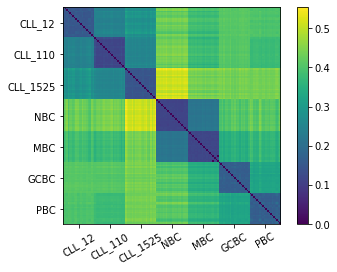

In [10]:
num_classes = 7
m = [[np.linalg.norm(x[i]-x[j]) for i in range(len(x))] for j in range(len(x))]
plt.imshow(m)
plt.colorbar()
cells = ['CLL_12', 'CLL_110', 'CLL_1525', 'NBC', 'MBC', 'GCBC', 'PBC']
plt.xticks([20*i + 10 for i in range(num_classes)], cells, rotation = 30)
plt.yticks([20*i + 10 for i in range(num_classes)], cells)
plt.show()

- CLLs seem to be close
- NBC and MBC seem to be close

This data is enough to perfectly cluster the cell types:

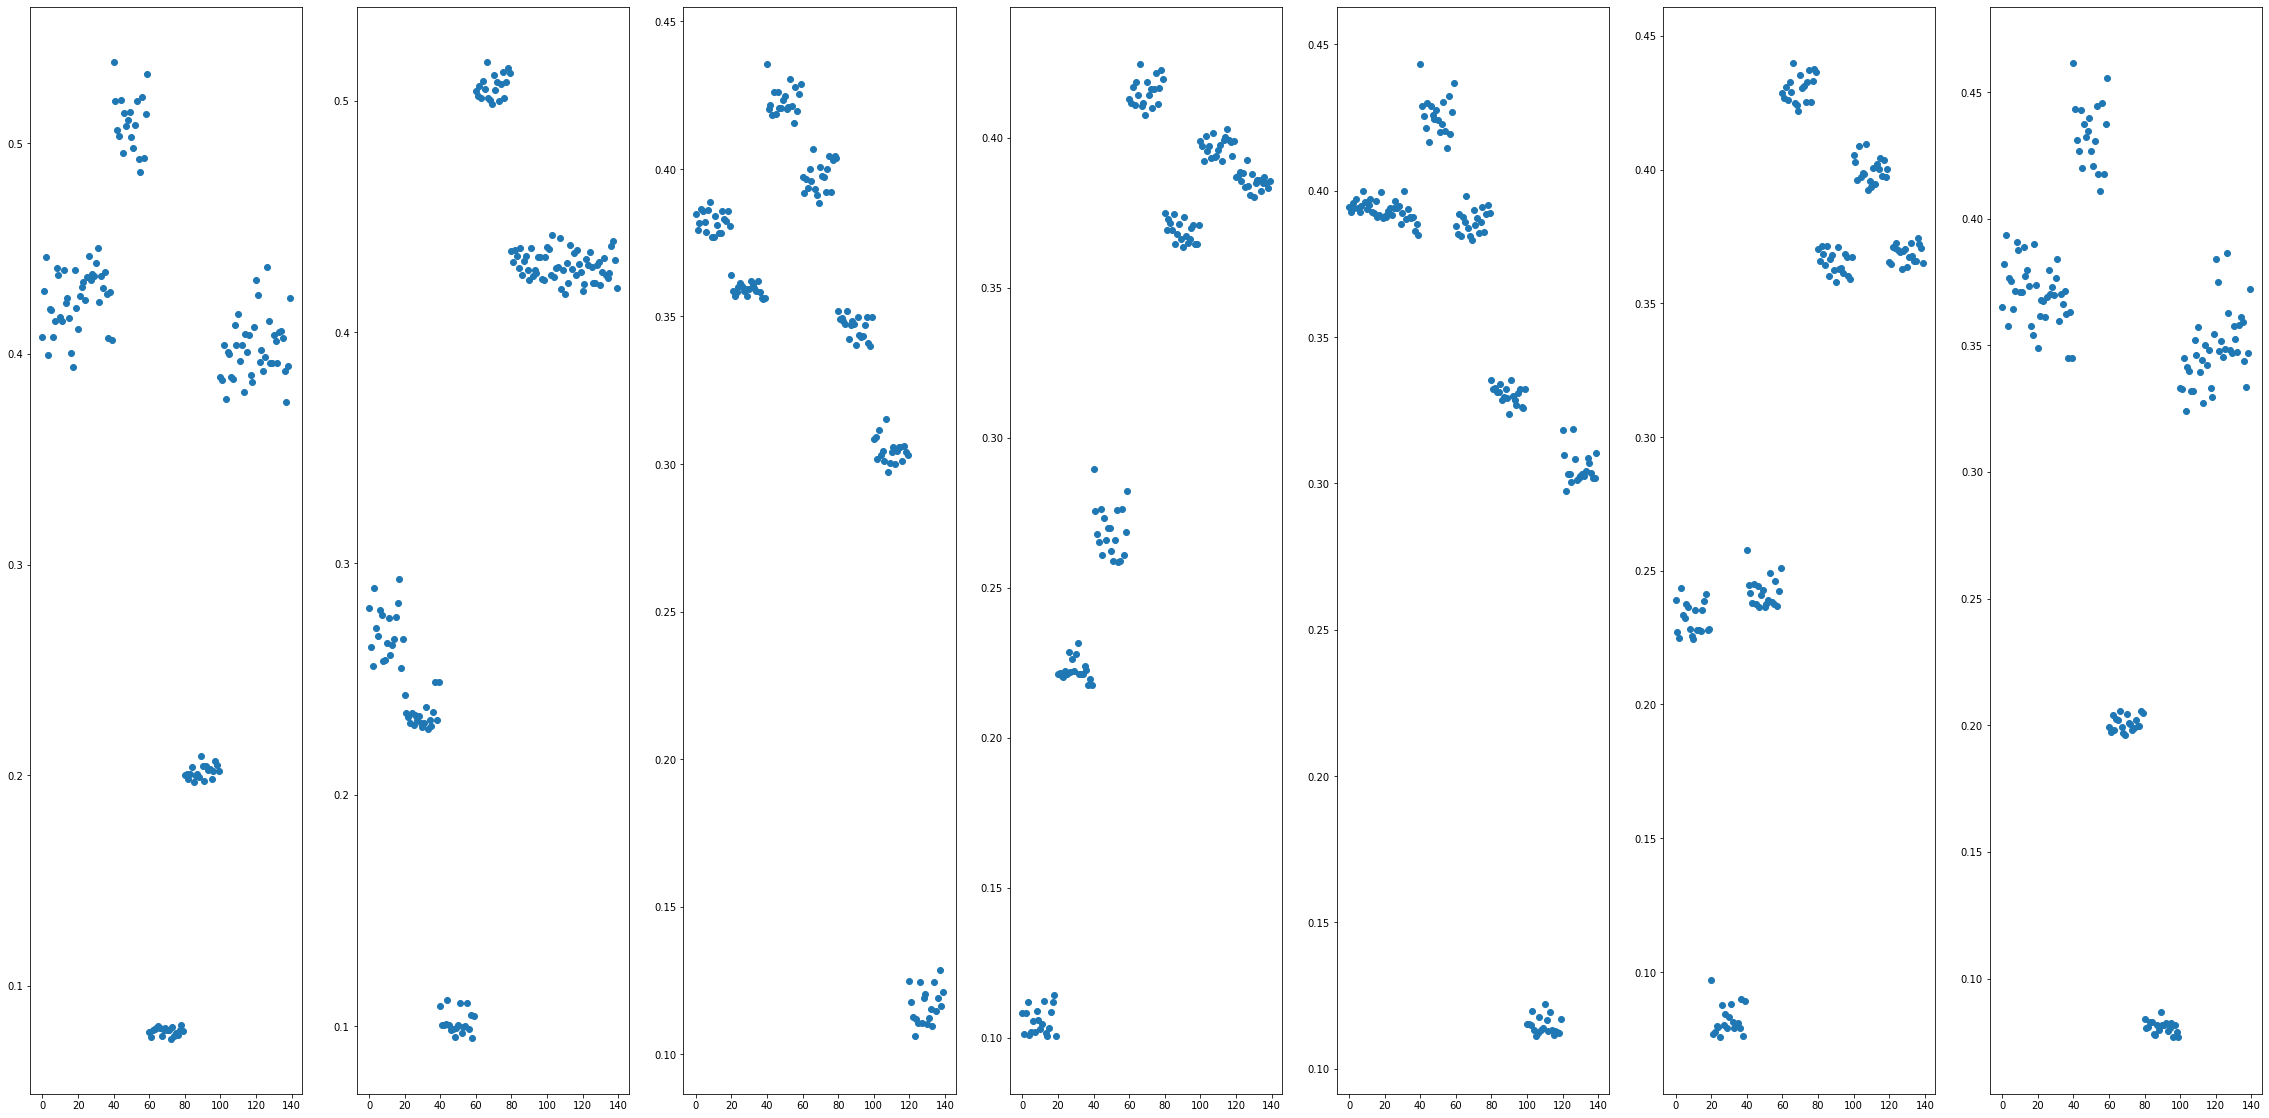

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_classes)
kmeans.fit(x)
centers = kmeans.cluster_centers_

fig, axs = plt.subplots(1, num_classes, figsize=(40,20))

for i in range(len(centers)):
    dist = [np.linalg.norm(centers[i] - x[j]) for j in range(len(x))]
    axs[i].scatter(range(len(x)), dist)

The plot above shows the distance of each center found by kmeans to all the samples. We can see that each center is near just one of the cell types. This means that the clusters are well formed

In general we don't know how many cell types are in our data. To find this out we can do the following:

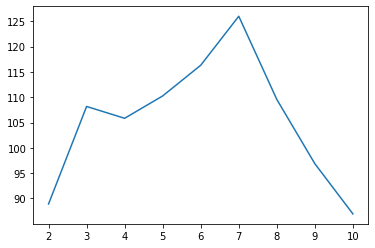

In [50]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

v = []

for i in range(2,11):
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(x)
    labels = kmeans_model.labels_
    v.append(metrics.calinski_harabasz_score(x, labels))
    
plt.plot(range(2,11), v)
plt.show()

The number of clusters that maximizes Calinski-Harabasz index is the one 